In [114]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

In [115]:
# We want to compress a jpg image using SVD.

# information of picture mone_small.jpg
# monet.jpg
# Title:
# Woman with a Parasol - Madame Monet and Her Son
# Artist:
# Claude Monet
# Medium:
# Oil on canvas
# Dimensions:
# overall-100 x 81 cm
# framed-119.4 x 99.7 cm
# Date made:
# 1875
# Collection:
# National Gallery of Art, Washington

img_path = 'img/monet_small.jpg'
image1 = Image.open(img_path)

In [116]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [117]:
image_tensor = transform(image1)

In [118]:
image_tensor.shape

torch.Size([3, 1239, 1000])

In [119]:
def tensor_imshow(tensor_img):
    image_np = tensor_img.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    plt.imshow(image_np)
    plt.show()

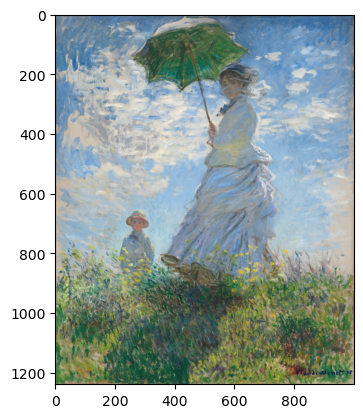

In [120]:
tensor_imshow(image_tensor)

In [121]:
a = np.array([[1,2], [3,4]])
u, s, vh = np.linalg.svd(a)
print(s)
print(u.shape, s.shape, vh.shape)
print(np.matmul(np.matmul(u,np.diag(s)), vh))

[5.4649857  0.36596619]
(2, 2) (2,) (2, 2)
[[1. 2.]
 [3. 4.]]


In [122]:
u, s, vh = np.linalg.svd(image_tensor)
print(u.shape, s.shape, vh.shape)

(3, 1239, 1239) (3, 1000) (3, 1000, 1000)


In [123]:
# Assuming s is 2-dimension,
# returns a s.shape[0] * k * k tensor
# where i-th k * k matrix is diag(s[k,:]).
def diag_stack(s, k):
    return np.stack([np.diag(row) for row in s[:,:k]])

In [124]:
def tensor_k_approx(u, s, vh, k):
    size_u = u.shape[1]
    size_vh = vh.shape[1]
    s_stacked = np.pad(diag_stack(s, k), ((0,0),(0, size_u - k), (0, size_vh - k)))
    tensor_compressed = np.matmul(u, np.matmul(s_stacked, vh))
    # the approximation matrix might be > 1.0, thus we need to limit the values by 1.0.
    return np.clip(tensor_compressed, 0., 1.)

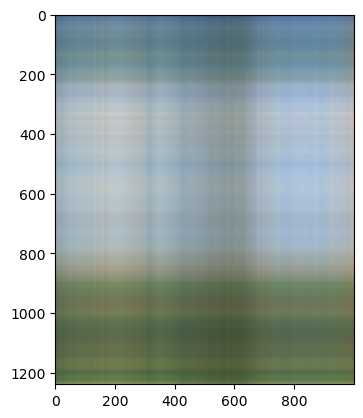

In [125]:
tensor_imshow(torch.from_numpy(tensor_k_approx(u, s, vh, 1)))

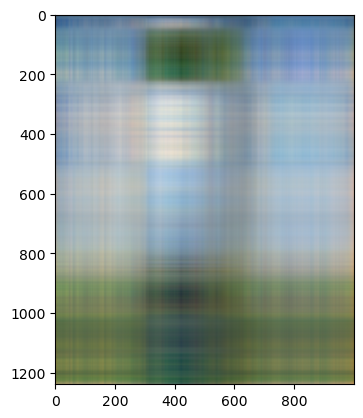

In [126]:
tensor_imshow(torch.from_numpy(tensor_k_approx(u, s, vh, 2)))

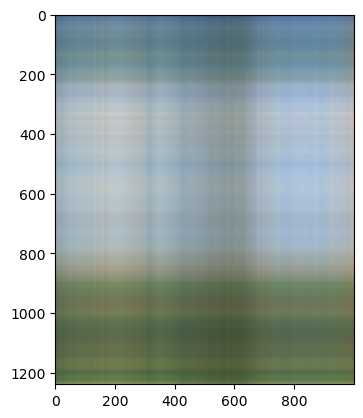

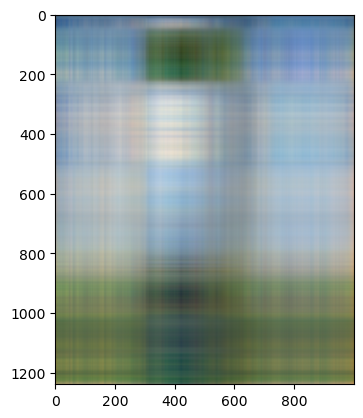

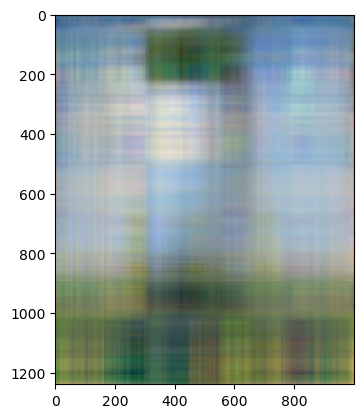

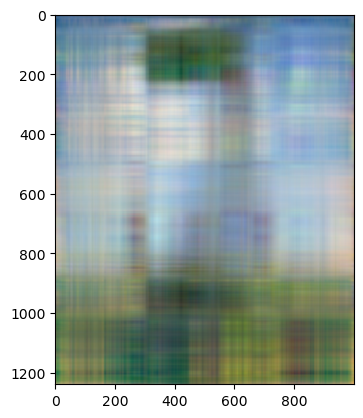

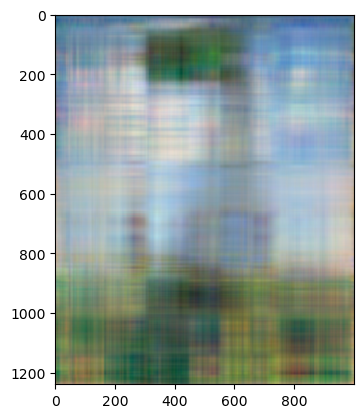

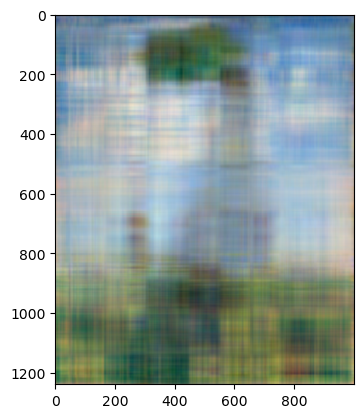

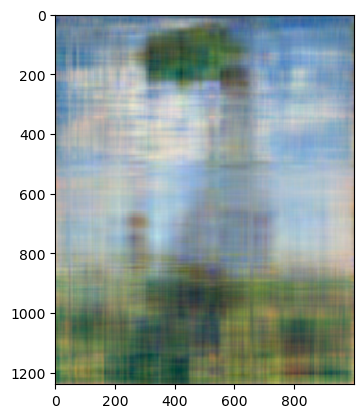

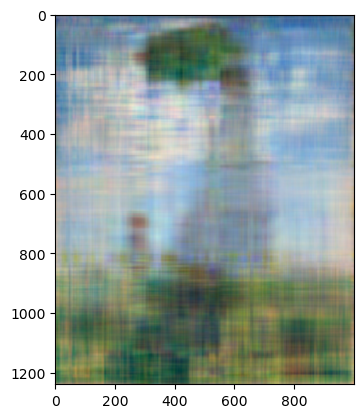

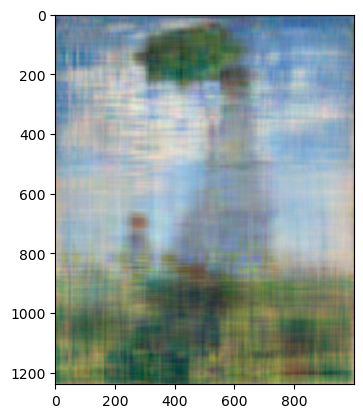

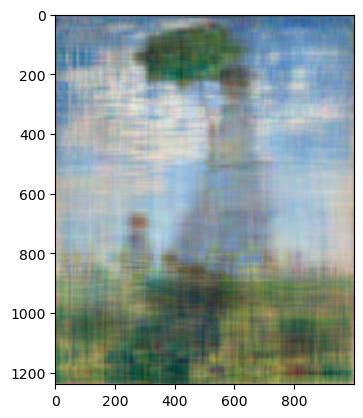

In [127]:
for i in range(1, 10+1):
    tensor_imshow(torch.from_numpy(tensor_k_approx(u, s, vh, i)))